In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from joblib import Parallel, delayed

In [2]:
df_k1to6 = pd.read_csv('deltas_and_std_k1to6.csv')

deltas_k1to6 = df_k1to6['delta'].tolist()
std_k1to6 = df_k1to6['std'].tolist()

df_k1to8 = pd.read_csv('deltas_and_std_k1to8.csv')

deltas_k1to8 = df_k1to8['delta'].tolist()
std_k1to8 = df_k1to8['std'].tolist()

df_k3to6 = pd.read_csv('deltas_and_std_k3to6.csv')

deltas_k3to6 = df_k3to6['delta'].tolist()
std_k3to6 = df_k3to6['std'].tolist()

df_k3to8 = pd.read_csv('deltas_and_std_k3to8.csv')

deltas_k3to8 = df_k3to8['delta'].tolist()
std_k3to8 = df_k3to8['std'].tolist()

/var/folders/wh/h8p20wfx6_gb62mc1gww1sm40000gn/T/ipykernel_2696/1812637966.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=20)


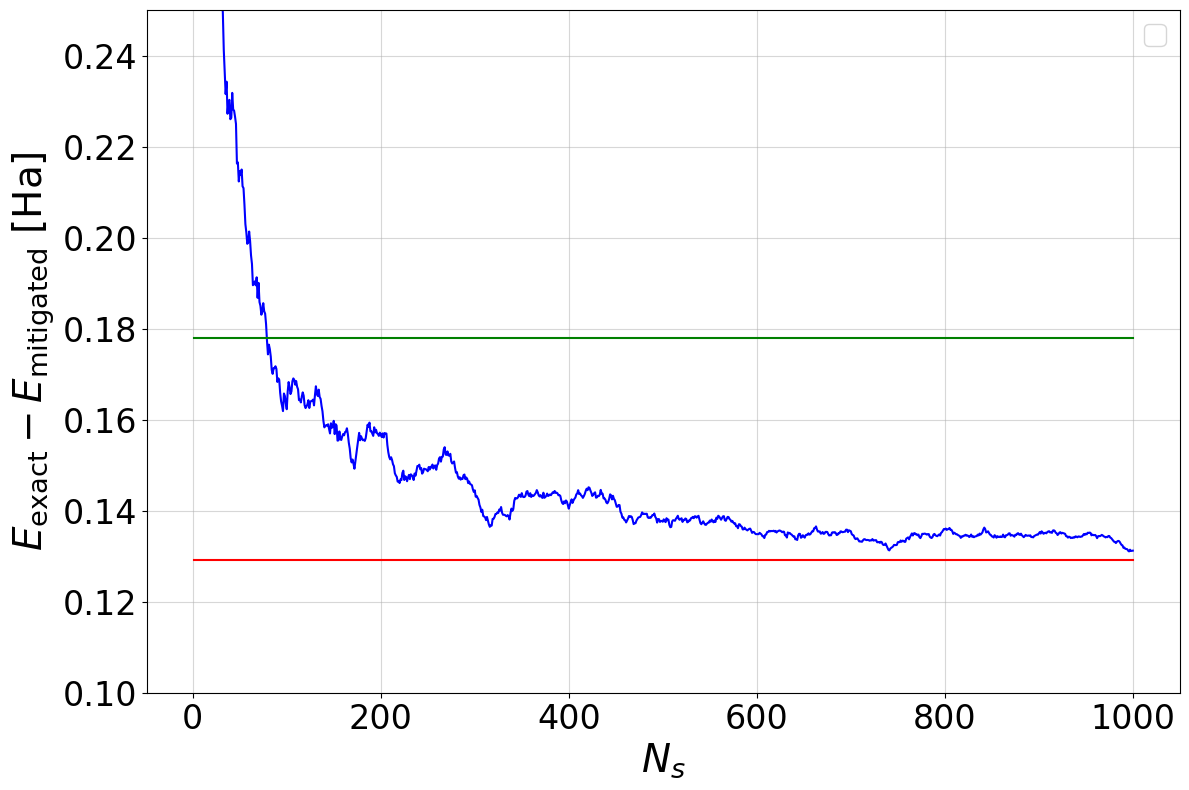

In [5]:
ES_6 = [0.1292490928337653 for _ in range(1000)]
tr_6 = [0.17788395511241406 for _ in range(1000)]
x = np.arange(1, 1001)

plt.figure(figsize=(12, 8))
'''plt.plot(x, deltas_k1to6, linestyle='-', color='b', label='NCE CDR')
plt.plot(x, ES_6, linestyle='-', color='r', label='ES CDR')
plt.plot(x, tr_6, linestyle='-', color='g', label='traditional CDR')'''
plt.plot(x, deltas_k1to6, linestyle='-', color='b')
plt.plot(x, ES_6, linestyle='-', color='r')
plt.plot(x, tr_6, linestyle='-', color='g')
#plt.plot(x, exact, label="exact value")
#plt.plot(x_linear, noisy, label="noisy value")

plt.ylim(0.1, 0.25)

#plt.title('Averages', fontsize=16)
plt.xlabel(r'$N_s$', fontsize=28)
plt.ylabel(r'$E_{\mathrm{exact}} - E_{\mathrm{mitigated}}\ [\mathrm{Ha}]$', fontsize=28)
plt.legend(fontsize=20)
plt.grid(alpha=0.5)
plt.xticks(fontsize=24) 
plt.yticks(fontsize=24)

plt.tight_layout()
#plt.savefig("avg.png")

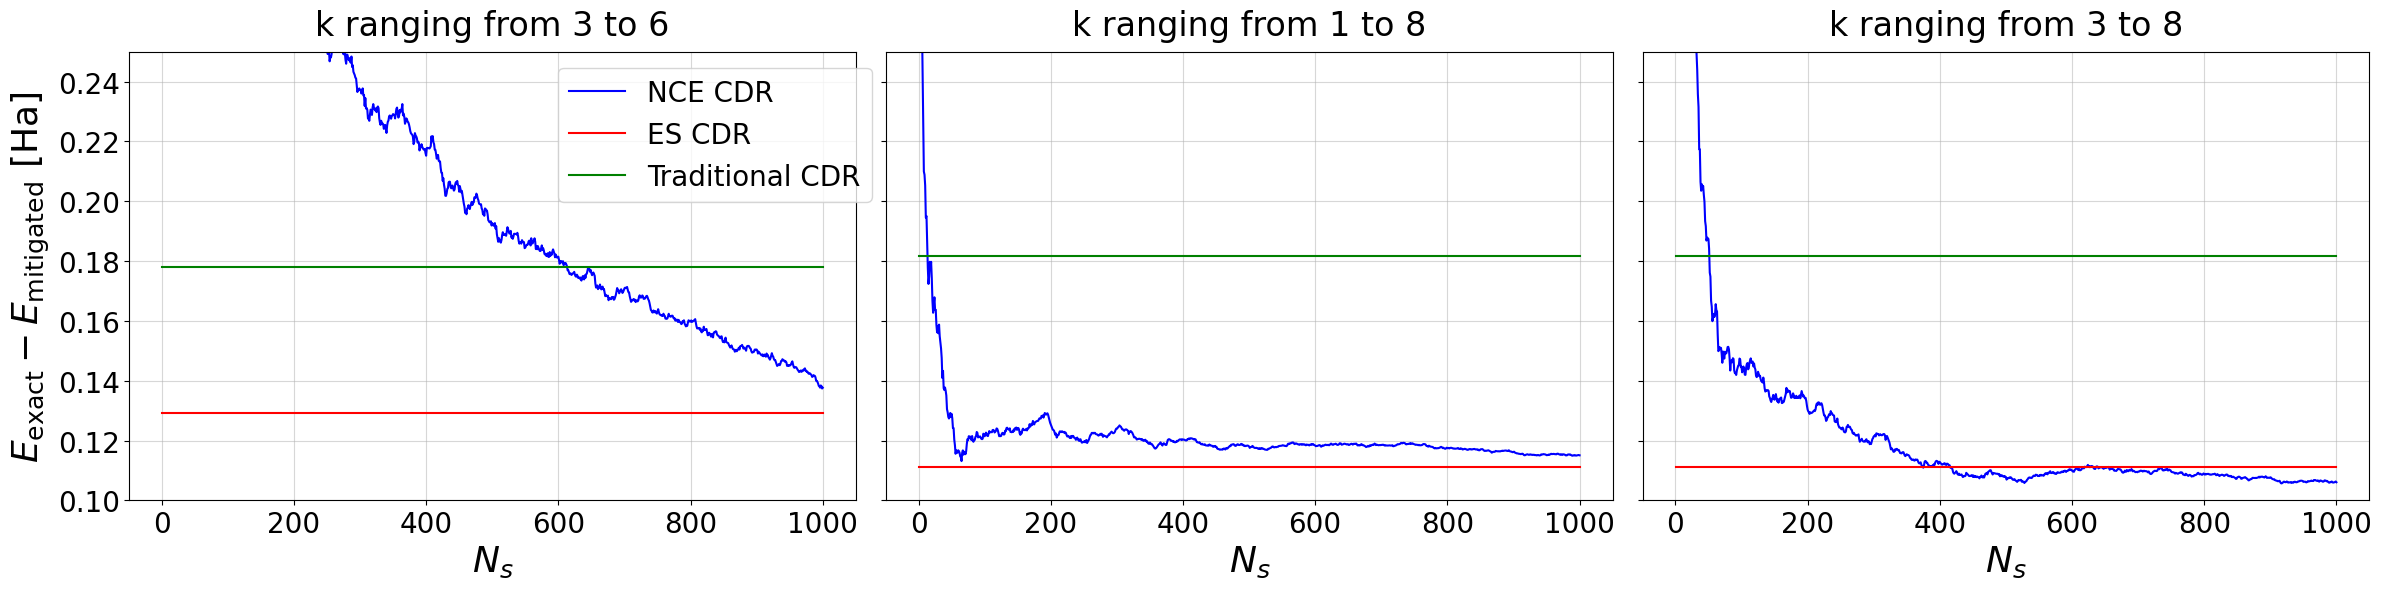

In [4]:
import numpy as np
import matplotlib.pyplot as plt

ES_6 = [0.1292490928337653 for _ in range(1000)]
ES_8 = [0.11118769040611776 for _ in range(1000)]
tr_6 = [0.17788395511241406 for _ in range(1000)]
tr_8 = [0.1815781084306085 for _ in range(1000)]
x = np.arange(1, 1001)

fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=True)


axes[0].plot(x, deltas_k3to6, linestyle='-', color='b', label='NCE CDR')
axes[0].plot(x, ES_6, linestyle='-', color='r', label='ES CDR')
axes[0].plot(x, tr_6, linestyle='-', color='g', label='traditional CDR')
axes[0].set_ylim(0.1, 0.25)
axes[0].set_xlabel(r'$N_s$', fontsize=26)
axes[0].set_ylabel(r'$E_{\mathrm{exact}} - E_{\mathrm{mitigated}}\ [\mathrm{Ha}]$', fontsize=26)
axes[0].set_title('k ranging from 3 to 6', fontsize=24, pad=12)
axes[0].grid(alpha=0.5)
axes[0].tick_params(axis='both', labelsize=20)


axes[1].plot(x, deltas_k1to8, linestyle='-', color='b', label='NCE CDR')
axes[1].plot(x, ES_8, linestyle='-', color='r', label='ES CDR')
axes[1].plot(x, tr_8, linestyle='-', color='g', label='traditional CDR')
axes[1].set_ylim(0.1, 0.25)
axes[1].set_xlabel(r'$N_s$', fontsize=26)
axes[1].set_title('k ranging from 1 to 8', fontsize=24, pad=12)
axes[1].grid(alpha=0.5)
axes[1].tick_params(axis='both', labelsize=20)


axes[2].plot(x, deltas_k3to8, linestyle='-', color='b', label='NCE CDR')
axes[2].plot(x, ES_8, linestyle='-', color='r', label='ES CDR')
axes[2].plot(x, tr_8, linestyle='-', color='g', label='traditional CDR')
axes[2].set_ylim(0.1, 0.25)
axes[2].set_xlabel(r'$N_s$', fontsize=26)
axes[2].set_title('k ranging from 3 to 8', fontsize=24, pad=12)
axes[2].grid(alpha=0.5)
axes[2].tick_params(axis='both', labelsize=20)

fig.legend(['NCE CDR', 'ES CDR', 'Traditional CDR'],
           loc='upper center', bbox_to_anchor=(0.3, 0.9), ncol=1, fontsize=20)

plt.tight_layout()
plt.show()